# Data Diri
*   Nama : Adeline Hikmalia Iqbal
*   Domisili : Kota Bogor, Jawa Barat
*   No. Registrasi : 0182180120-75
*   Machine Learning - IBM

# Import Data

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adelinehikmaliaiqbal","key":"e1cdeef1da58ba34c0494ce7af3919c6"}'}

In [3]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 82% 21.0M/25.7M [00:00<00:00, 39.9MB/s]
100% 25.7M/25.7M [00:00<00:00, 85.4MB/s]


In [29]:
import zipfile
zip_ref = zipfile.ZipFile('imdb-dataset-of-50k-movie-reviews.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [211]:
import pandas as pd
data = pd.read_csv('/content/files/IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [180]:
# kategori label
data.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

# Visualisasi Data

Review Positif ada 25000 
Review Negatif ada 25000 
dari total 50000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


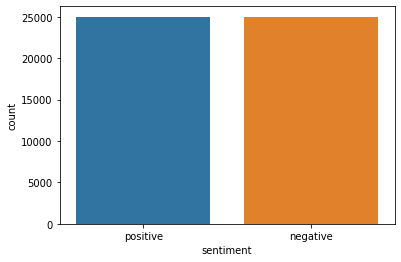

In [212]:
import seaborn as sns
negatif = len(data[data['sentiment'] == 'negative'])
positif = len(data[data['sentiment'] == 'positive'])
sns.countplot(data['sentiment'])

print('Review Positif ada {} \nReview Negatif ada {} \ndari total {}'.format(negatif,positif,len(data)))

In [213]:
X = data['review'].values
Y = data['sentiment'].values

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

# Preprocessing

In [215]:
import nltk, os, re, string

from keras.layers import Input, LSTM, Bidirectional, SpatialDropout1D, Dropout, Flatten, Dense, Embedding, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1. Mengubah menjadi huruf kecil

In [216]:
data.review = data.review.apply(lambda x: x.lower())

### 2. Menghapus tanda baca

In [217]:
def clean_text(data):
  return data.translate(str.maketrans('','', string.punctuation))
data.review = data.review.apply(lambda x: clean_text(x))

### 3. Menghapus tags

In [219]:
def remove_tags(data):
  return re.compile(r"<[^>]+>").sub(" ",data)
data.review = data.review.apply(lambda x: remove_tags(x))

### 4. Menghapus angka

In [221]:
def remove_number(data):
  return re.sub(r"([0-9]+)","", data)
data.review = data.review.apply(lambda x: remove_number(x))

### 5. Lemmatisasi

In [222]:
lemmatisasi = WordNetLemmatizer()

def lem(data):
  pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
  return ' '.join([lemmatisasi.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())])
  data.review = data.review.apply(lambda x: lem(x))

### 6. Menghapus stopwords

In [223]:
stopword = stopwords.words()

def stopword(data):
  return ' '.join([word for word in data.split() if word not in stopword])
  data.review = data.review.apply(lambda x: stopword(x))

In [224]:
data
# sudah bersih

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,im going to have to disagree with the previous...,negative


### 7. Tokenisasi

In [225]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 10000, oov_token = '<OOV>', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)
 
pad_train = pad_sequences(seq_train, maxlen = 500, truncating = 'post', padding = 'pre') 
pad_test = pad_sequences(seq_test, maxlen = 500, truncating = 'post', padding = 'pre')

word_index = tokenizer.word_index
print('Total Kata Unik : {}'.format(len(word_index)))

Total Kata Unik : 124307


### 8. Embedding

In [227]:
vocab_size =  len(word_index)
oov_tok = "<OOV>"
embedding_dim = 200

In [156]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2021-07-15 08:33:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-07-15 08:33:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-07-15 08:33:20--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [228]:
import numpy as np
embeddings_index = {}
with open('/content/glove.6B.200d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

# Membangun Arsitektur Model LSTM

In [229]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, weights = [embeddings_matrix], trainable = False, input_length = 500),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,activation = 'relu'),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 200)          24861600  
_________________________________________________________________
bidirectional_7 (Bidirection (None, 128)               135680    
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [230]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(pad_train,Y_train, epochs = 30, callbacks=[es], validation_data=(pad_test,Y_test))

Epoch 1/30
1250/1250 [==============================] - 643s 512ms/step - loss: 0.4704 - accuracy: 0.7775 - val_loss: 0.3652 - val_accuracy: 0.8454
Epoch 2/30
1250/1250 [==============================] - 644s 516ms/step - loss: 0.3277 - accuracy: 0.8669 - val_loss: 0.2996 - val_accuracy: 0.8705
Epoch 3/30
1250/1250 [==============================] - 650s 520ms/step - loss: 0.2889 - accuracy: 0.8841 - val_loss: 0.2908 - val_accuracy: 0.8760
Epoch 4/30
1250/1250 [==============================] - 642s 514ms/step - loss: 0.2619 - accuracy: 0.8948 - val_loss: 0.2603 - val_accuracy: 0.8922
Epoch 5/30
1250/1250 [==============================] - 648s 518ms/step - loss: 0.2435 - accuracy: 0.9045 - val_loss: 0.2808 - val_accuracy: 0.8844
Epoch 6/30
1250/1250 [==============================] - 642s 513ms/step - loss: 0.2256 - accuracy: 0.9120 - val_loss: 0.2572 - val_accuracy: 0.8935
Epoch 7/30
1250/1250 [==============================] - 644s 515ms/step - loss: 0.2078 - accuracy: 0.9196 - val_

# Evaluasi Model

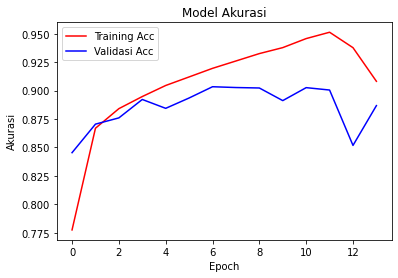

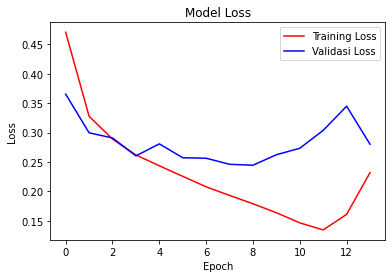

In [233]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validasi Acc')
plt.title('Model Akurasi')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(loc = 0)
plt.figure()
  
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validasi Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 0)
plt.show()

In [234]:
print('Akurasi Data Train: {}'.format(max(acc)))
print('Akurasi Data Test: {}'.format(max(val_acc)))

Akurasi Data Train: 0.951324999332428
Akurasi Data Test: 0.9034000039100647
